# Домашнее задание 5 - Шмаков В.Е. ФФКЭ - гр. Б04-105

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from matplotlib import cm
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
import scipy.stats as sts
import pandas as pd

### Задача 1. Апостериорное распределение для параметра распределения Пуассона.


Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_\lambda(n)=\frac{\lambda^n}{n !} e^{-\lambda} \text {. }
$$
1. В ходе эксперимента счетчик Гейгера сработал за минуту $m$ раз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$. Указание: априорную плотность вероятности $\lambda$ можно считать постоянной (так как мы изначально ничего не знаем про $\lambda$ ) .
2. Эксперимент повторили еще раз, в этот раз счетчик Гейгера сработал за минуту $m^{\prime}$ раз. Как обновилось апостериорное распределение на $\lambda$ ?

1. Пусть событие $A$ заключается в том, что счетчик Гейгера сработал $m$ раз. 

Согласно теореме Байеса:
$$
P(\lambda | A) = \frac{P(A | \lambda) p_{0}(\lambda)}{P(A)}
$$

Вероятноcть события A при фиксированном $\alpha$
$$
P(A | \lambda) = \frac{\lambda^{m}}{m!} e^{-\lambda}
$$

А значит
$$
P(\lambda | A) \sim  \frac{\lambda^{m}}{m!} e^{-\lambda}
$$
> Исходное априорное распределение сократилось при нормировке

2. Считаем $P(\lambda | A)$ новым априорным распределением

$$
P_{1}(\lambda | A) = \frac{P(A | \lambda) P(\lambda | A)}{P(A)} \sim \frac{\lambda^{m + m'}}{m! m'!} e^{- 2 \lambda}
$$

### Задача 3

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

In [2]:
data, target = load_diabetes(return_X_y = True)
a = 1e-6
alpha_linspace = np.linspace(a, 1, 200)
coeff = []
for mu in alpha_linspace:
    model = linear_model.Lasso(alpha = mu).fit(data, target)
    coeff.append(model.coef_)

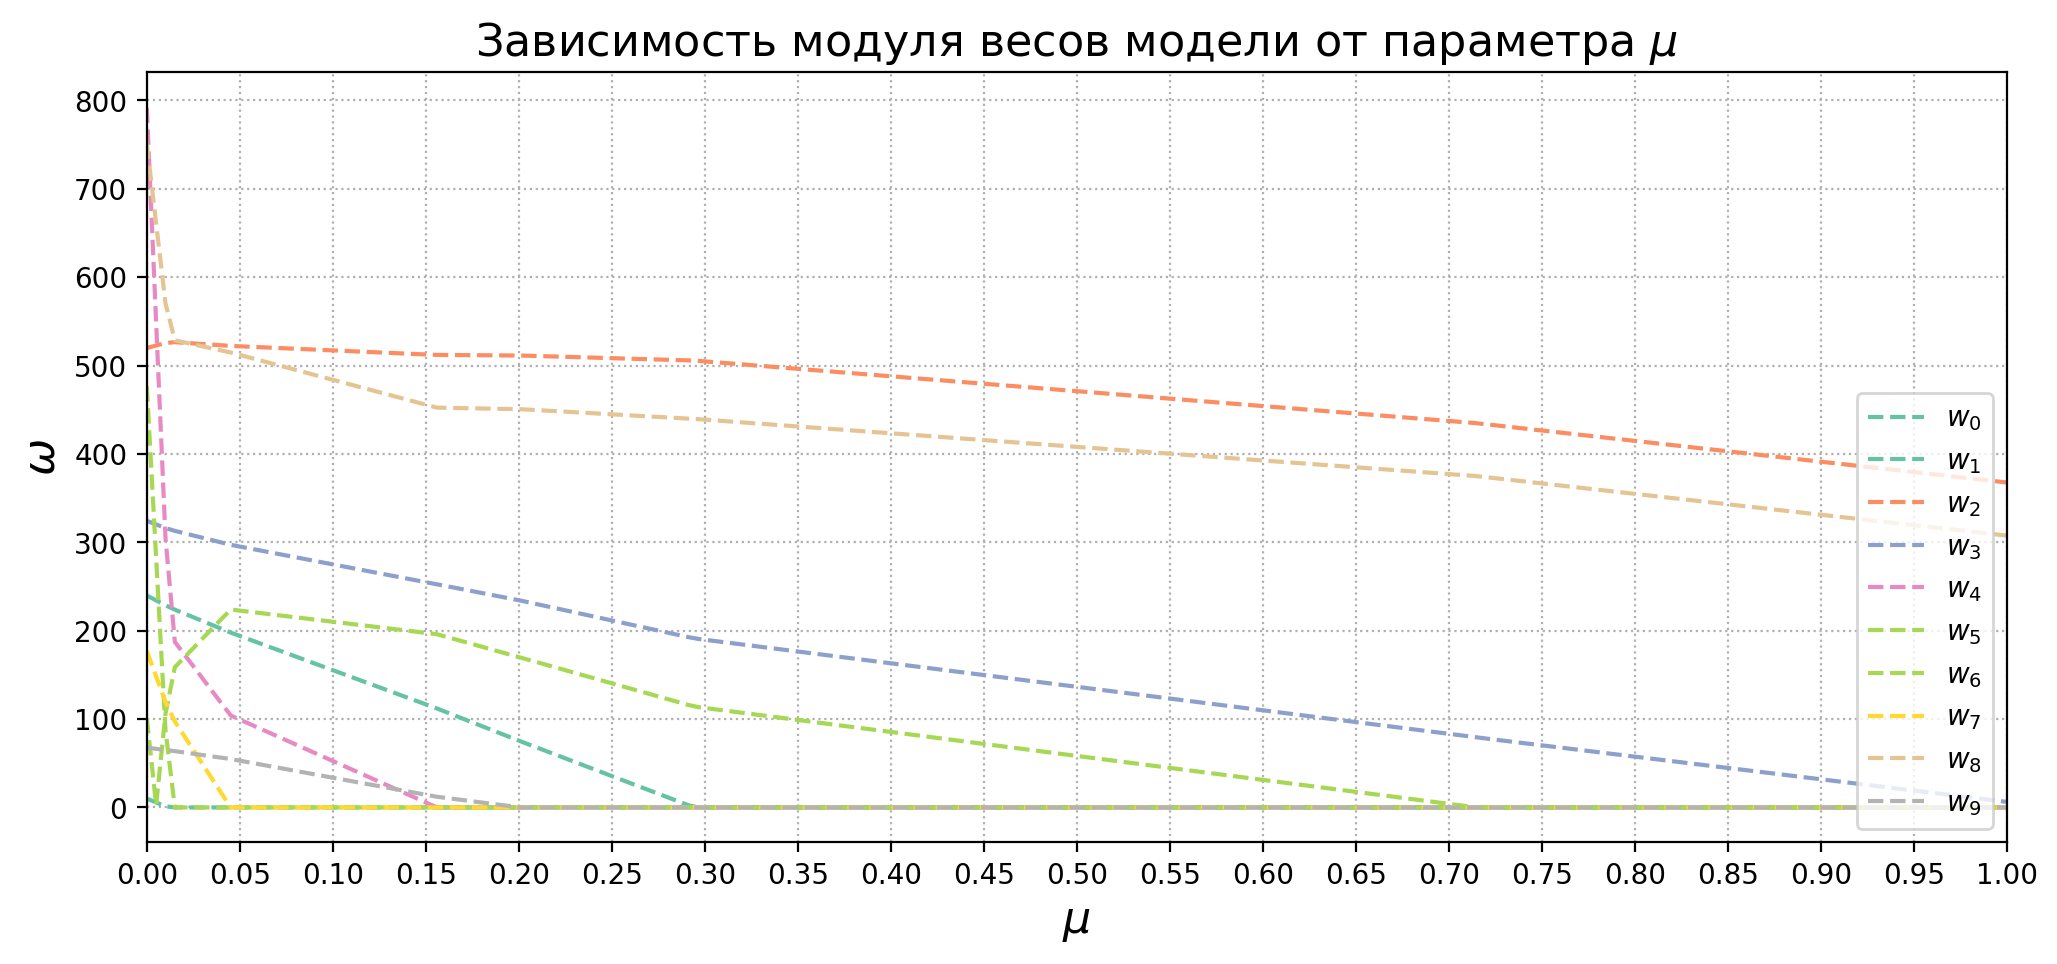

In [3]:
coeff = np.array(coeff)

plt.figure(figsize = (12, 5), dpi = 200)
for ind, c in enumerate(coeff.T):
    plt.plot(alpha_linspace, np.abs(c), label = f'$w_{ind}$', color = cm.Set2(ind / 10), linestyle = '--')

plt.legend(loc = 'lower right')
plt.grid(ls = ':')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.xlim(0, 1)
plt.xlabel("$\mu$", fontsize = 16)
plt.ylabel("$\omega$", fontsize = 16)
plt.title("Зависимость модуля весов модели от параметра $\mu$", fontsize = 16);

### Задача 4

На семинаре обсуждалось решение задачи регрессии с L1-регуляризацией с помощью метода градиентного спуска. C помощью K-Fold кроссвалидаций (K=3) осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate). В качестве данных возьмите значения какой-нибудь неполиномиальной функции на равномерной или случайной сетке (на выбор семинариста) с добавленным гауссовым шумом. Насколько стабильно по отношению к запуску работает градиентный спуск?

In [4]:
x, y = (np.random.rand(400) - 0.5) * 6, (np.random.rand(400) - 0.5) * 6
some_func = lambda a, b, c, x, y: a * np.sin(x) + b * np.cos(y) + c * x * y

data = pd.DataFrame({'x': x,
                     'y': y,
                     'f': some_func(1, 2, 3,x, y) + sts.norm(0, 0.1).rvs(len(x))})
data.head()

,x,y,f
0,2.554342,-1.553753,-11.345536
1,-2.098005,0.176770,-0.063886
2,-2.981859,0.974197,-7.856445
3,2.432404,-1.126611,-6.670676
4,-0.457732,-1.252454,1.940561


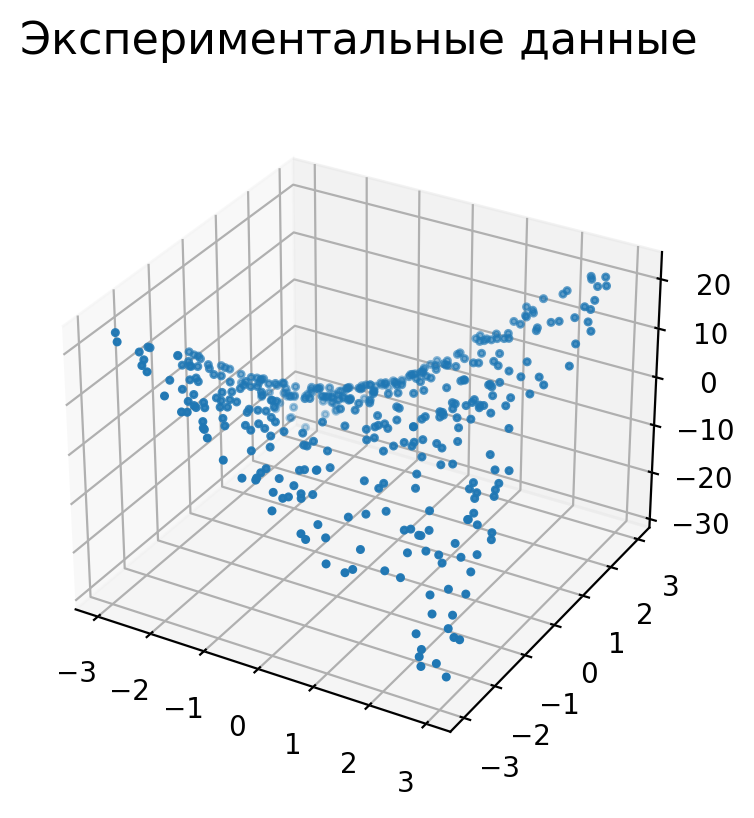

In [5]:
fig = plt.figure(figsize = (4, 4), dpi = 200)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter3D(data.x, data.y, data.f, s = 5)
fig.suptitle('Экспериментальные данные', fontsize = 16)
fig.tight_layout();

Пусть сгенерерированные точки являются результатом некоторого эксперимента. Найдём наилучшие параметры $\alpha$, $\beta$, $\gamma$, в предположении что модельная функция имеет вид:
$\alpha \operatorname{sin}(x) + \beta \operatorname{cos}(y) + \gamma x y$.


In [6]:
data['sinx'] = np.sin(data.x)
data['cosy'] = np.cos(data.y)
data['xy'] = data.x * data.y

X, y = data[['sinx', 'cosy', 'xy']], data.f

Разобъём датасет на несколько частей и убедимся что распределения тестовой и тренировочной частей совпадают. 

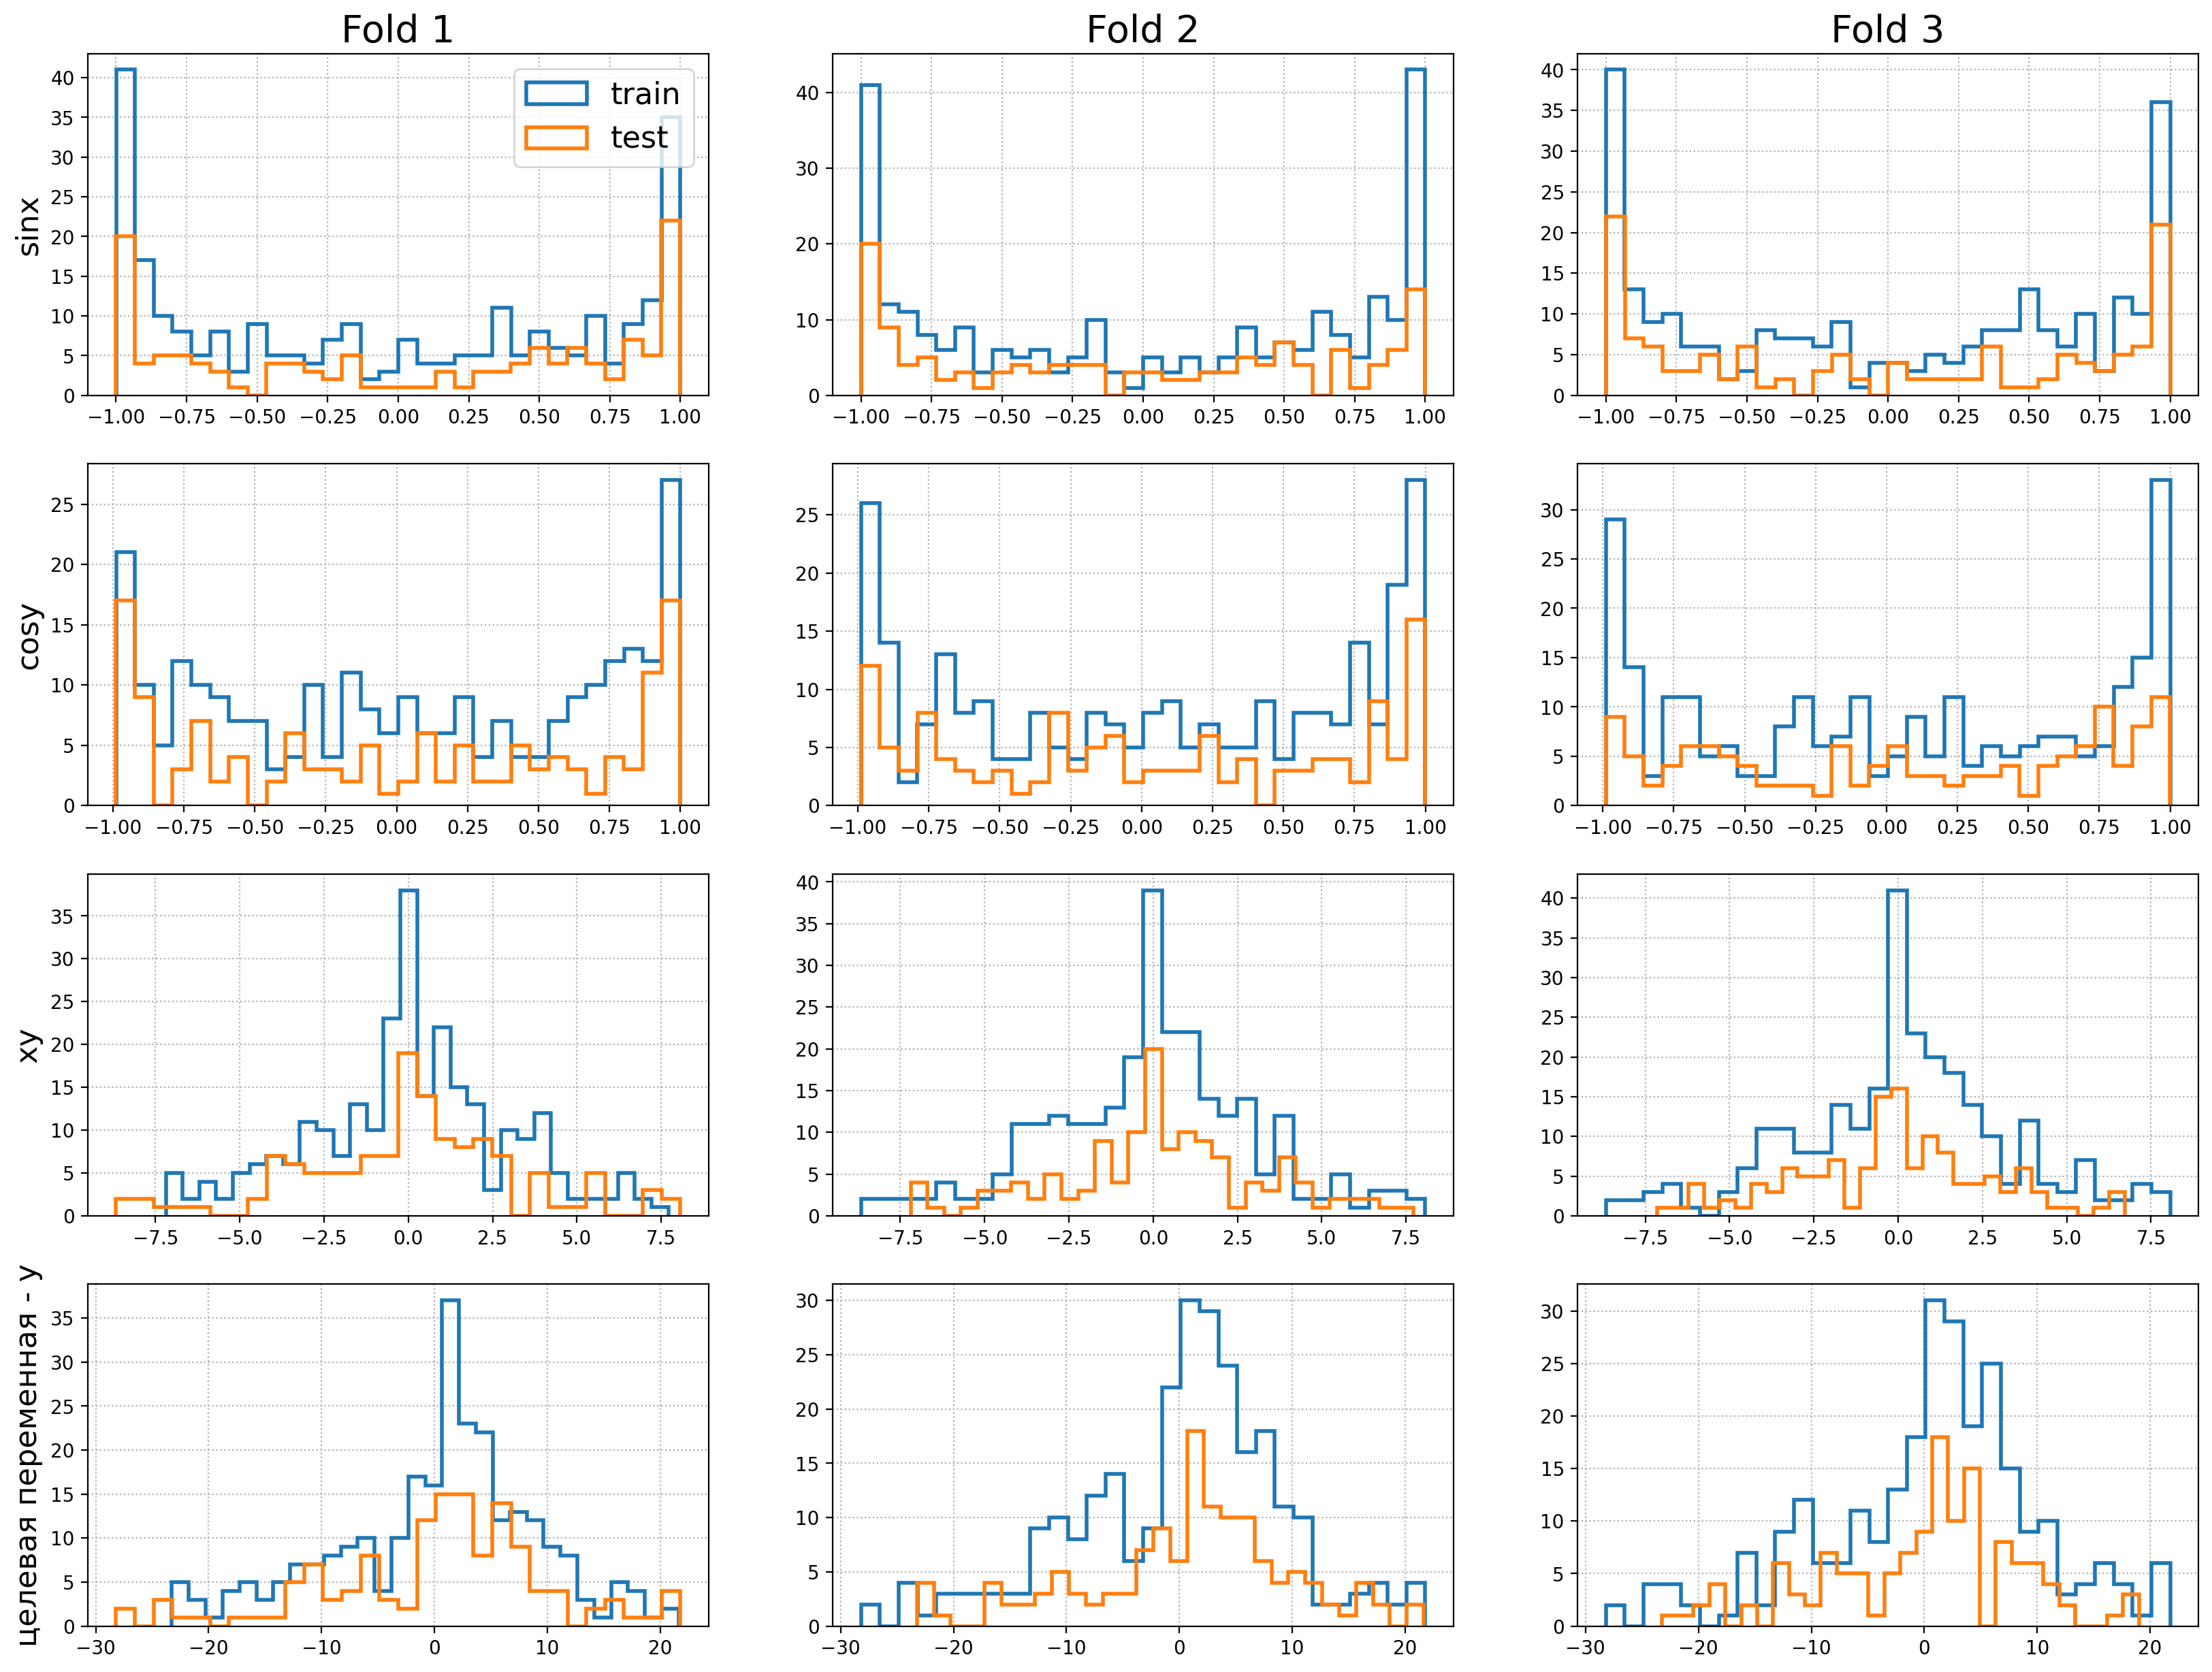

In [7]:
kf = KFold(n_splits = 3, shuffle = True)

fig, ax = plt.subplots(len(X.keys()) + 1, 3, figsize = (20, 15), dpi = 200)

for ind, (train, test) in enumerate(kf.split(X)):
    for a, key in enumerate(X.keys()):
        ax[a][ind].hist(X[key][train], label = f'train', histtype = 'step', linewidth = 2, bins = 30)
        ax[a][ind].hist(X[key][test], label = f'test', histtype = 'step', linewidth = 2, bins = 30)
        ax[a][0].set_ylabel(f'{key}', fontsize = 16)
    ax[len(X.keys())][ind].hist(y[train], label = f'y train', histtype = 'step', linewidth = 2, bins = 30)
    ax[len(X.keys())][ind].hist(y[test], label = f'y test', histtype = 'step', linewidth = 2, bins = 30)

ax[0][0].legend(loc = 'upper right', fontsize = 16)
ax[-1][0].set_ylabel('целевая переменная - y', fontsize = 16)
for i, a in enumerate(ax[0]):
    a.set_title(f'Fold {i + 1}', fontsize = 20)
for a in ax:
    for b in a: b.grid(ls = ':')

В качестве модели будем использовать реализованный ниже класс:

In [8]:
class Model_L1:
    def __init__(self, lr, alpha, max_iteration = 1000):
        self.lr, self.alpha = lr, alpha
        self.max_iteration = max_iteration
    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1]) + 1
        i = 0
        prev_omega = np.inf
        while i < self.max_iteration and np.linalg.norm(prev_omega - self.w) > 1e-4:
            prev_omega = np.copy(self.w)
            self.__make_L1_regression_grad_descent_iteration__(X, y)
            i += 1
    def predict(self, X):
        return X @ self.w
    def __make_L1_regression_grad_descent_iteration__(self, X, y):
        grad = 2 * (X @ self.w - y) @ X + 2 * self.alpha * np.sign(self.w)
        self.w -= self.lr * grad
    

Для подбора наилучших параметров модели(`lr`, `alpha`). Будем использовать метод `GridSearch`:
- Фиксируем сетку значений гиперпараметров.
- Для каждой пары гиперпараметров оцениваем точность модели используя кросс - валидацию.

In [9]:
def get_mse(lr, alpha, X, y):
    model = Model_L1(lr, alpha)
    mse = []
    for train, test in kf.split(X):
        model.fit(X[ train], y[train])
        mse.append(mean_squared_error(y[test], model.predict(X[ test])))
    return np.mean(mse)

In [10]:
lr_values, alpha_values = np.logspace(-4, -12, 9), np.arange(0, 0.5, 0.01)

In [11]:
mse = np.zeros(shape = (len(lr_values), len(alpha_values)))

for ind_1, lr in enumerate(lr_values):
     for ind_2, alpha in enumerate(alpha_values):
         mse[ind_1][ind_2] = get_mse(lr, alpha, X.to_numpy(), y.to_numpy())

Наилучшее значение alpha: 0.07
Наилучшее значение lr: 0.0001


Text(0, 0.5, 'alpha')

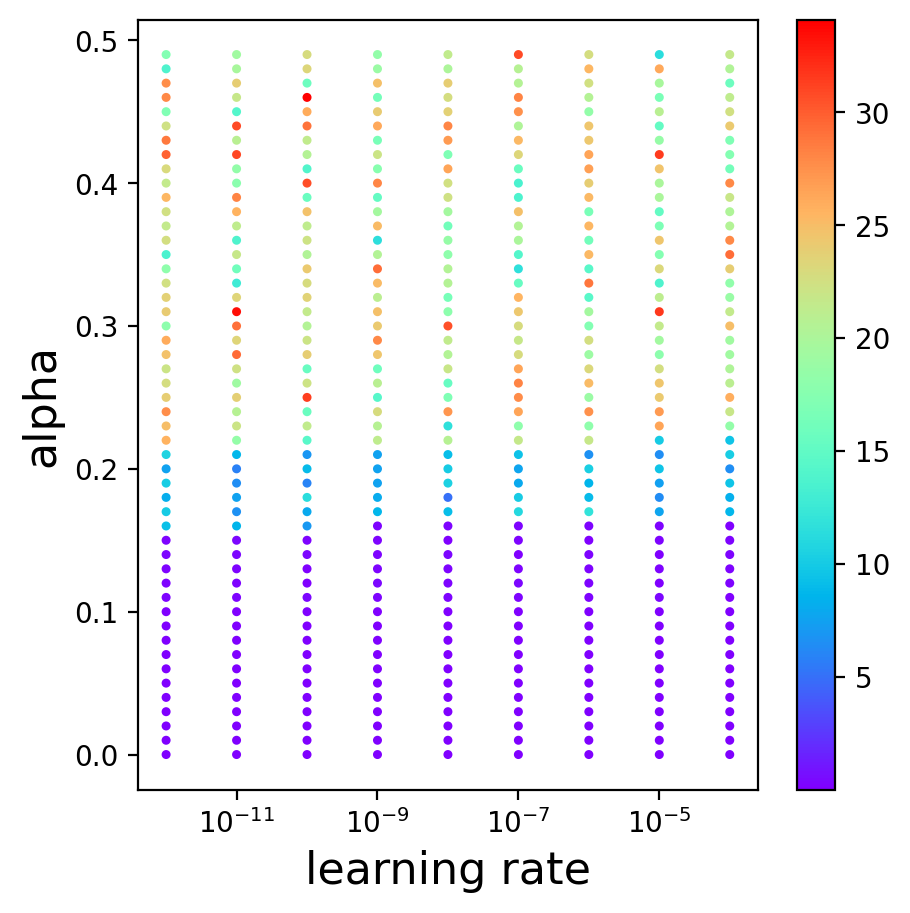

In [12]:
LR, A = np.meshgrid(lr_values, alpha_values)
best_param_ind = np.unravel_index(mse.argmin(), mse.shape)
a_best = alpha_values[best_param_ind[1]]
lr_best = lr_values[best_param_ind[0]]

print(f"Наилучшее значение alpha: {a_best}")
print(f"Наилучшее значение lr: {lr_best}")

plt.figure(figsize = (5, 5), dpi = 200)
plt.xscale('log')
plt.scatter(LR, A, c = mse, cmap = 'rainbow', s = 5)
plt.colorbar()
plt.xlabel('learning rate', fontsize = 16)
plt.ylabel('alpha', fontsize = 16)

In [13]:
model = Model_L1(alpha = a_best, lr = lr_best)
model.fit(X.to_numpy(), y.to_numpy())
print(model.w)

[0.9993275  1.99019567 3.00144722]


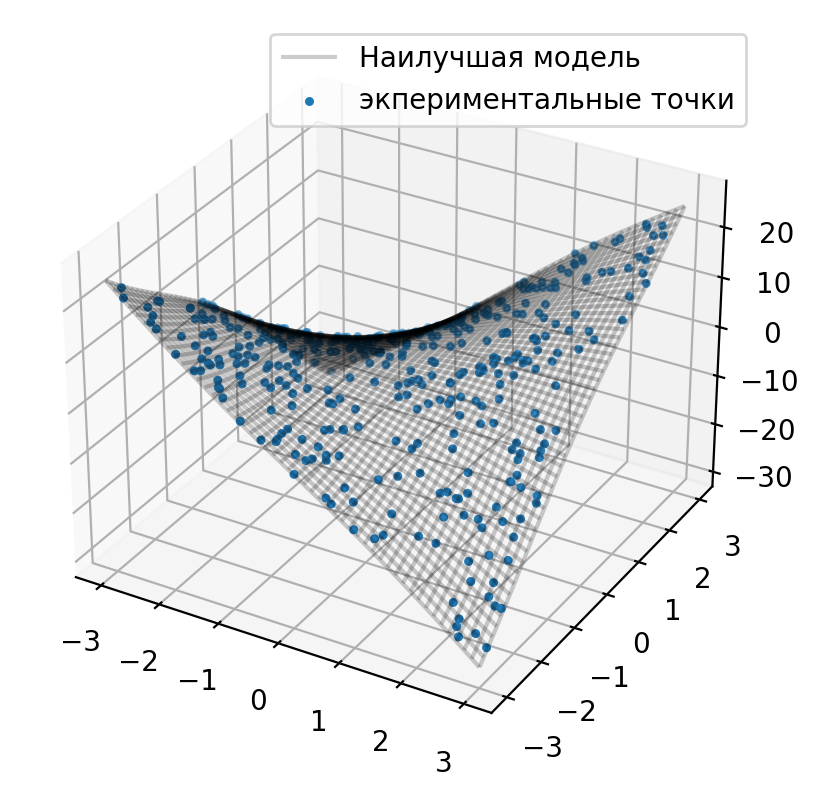

In [14]:
fig = plt.figure(figsize = (4, 4), dpi = 200)
ax = fig.add_subplot(111, projection = '3d')
x, y = np.linspace(-3, 3, 50), np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
ax.plot_wireframe(X, Y, some_func(*model.w, X, Y), alpha = 0.2, label = 'Наилучшая модель', color = 'black')
ax.scatter3D(data.x, data.y, data.f, s = 5, label = 'экпериментальные точки')
ax.legend()
fig.tight_layout();

### Задача 5

Покажите, что задача минимизации квадратичной функции потерь с дополнительным ограничением (лассо Тибширани):
$$
\mathcal{L}=\|X w-y\|^2 \rightarrow \min _w, \quad \sum_\alpha\left|w_\alpha\right|<C
$$
эквивалентна L1-регуляризации. Указание: можно воспользоваться условиями Каруша - Куна — Таккера (обобщение метода Лагранжа).
[Link](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0) .

Введем ошибку 
$$
L' = ||Xw - y||^2 + \mu \left(\sum_{\alpha} |w_{\alpha}| + C \right)
$$
> Обычная ошибка при L_1 регуляризации

Согласно условиям Каруша — Куна — Таккера минимальный вектор $\omega$, минимизирующий ошибку найдётся и будет удовлетворять условию жесткости:
$$
\mu \left(\sum_{\alpha} |w_{\alpha}| + C \right) = 0 \to  \sum_\alpha\left|w_\alpha\right|<C
$$